In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Mounting Drive to the Colab Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# We will read our CSV file from our Google Drive and store it in a variable called df
df = pd.read_csv('/content/drive/MyDrive/Copy of windows10_dataset.csv')

In [ ]:
#Viewing the shape and structure of our dataset/ counting rows and columns of the data set
df.shape

(35975, 127)

In [ ]:
#Viewing a portion of the dataset to learn more about it
df.head(10)

ts  Processor_DPC_Rate Processor_pct_ Idle_Time  \
0  1554206309                   4              29.90817156   
1  1554206319                   9              31.75168186   
2  1554206329                   5              29.49516707   
3  1554206339                  12              18.22437505   
4  1554206349                  12              14.86118688   
5  1554206359                  19              22.65734607   
6  1554206369                   9              19.29681662   
7  1554206379                   3              28.37464202   
8  1554206389                   3              23.96137477   
9  1554206399                   3              61.47313248   

  Processor_pct_ C3_Time Processor_pct_ Interrupt_Time Processor_pct_ C2_Time  \
0                      0                   0.078240397                      0   
1                      0                   0.312520973                      0   
2                      0                    1.16822183                      0   
3                      0                   1.097191902                      0   
4                      0                   1.562431019                      0   
5                      0                   0.781280243                      0   
6                      0                   2.734333712                      0   
7                      0                    0.31249565                      0   
8                      0                   0.624038207                      0   
9                      0                   0.704203572                      0   

  Processor_pct_ User_Time Processor_pct_ C1_Time  \
0              61.02750947            29.90817156   
1              59.14459419            31.75168186   
2              46.02794011            29.49516707   
3              47.80621859            18.22437505   
4               41.8731513            14.86118688   
5              39.45465229            22.65734607   
6              35.07759533            19.29681662   
7              52.18677356            28.37464202   
8              39.62642617            23.96137477   
9              21.04786233            61.47313248   

  Processor_pct_ Processor_Time Processor_C1_ransitions_sec  ...  \
0                    66.2001486                 480.0949912  ...   
1                   66.24773489                 427.0412837  ...   
2                   66.90038148                 1159.426821  ...   
3                   79.54520811                  736.622011  ...   
4                   82.73513724                 896.1085985  ...   
5                   74.06149592                 807.7940148  ...   
6                    75.7816157                 1665.275721  ...   
7                   69.45355021                 402.2928575  ...   
8                   72.85433798                 2141.205491  ...   
9                   36.30869913                 2936.251094  ...   

  LogicalDisk(_Total) Avg  Disk Write Queue Length  \
0                                      0.134876119   
1                                      0.157564294   
2                                      0.401773775   
3                                      0.259062331   
4                                      0.103836186   
5                                      0.151794426   
6                                      0.072069402   
7                                      0.048436586   
8                                      0.098540805   
9                                      0.004243389   

  LogicalDisk(_Total) Avg  Disk Queue Length  \
0                                0.163098103   
1                                0.189279353   
2                                0.782471877   
3                                0.768934004   
4                                1.081729712   
5                                0.804626257   
6                                1.082286927   
7                                0.142110442   
8                                 0.25154439   
9                           

In [ ]:
# Counting the empty columns
df.isna().sum()

ts                                              0
Processor_DPC_Rate                              0
Processor_pct_ Idle_Time                        0
Processor_pct_ C3_Time                          0
Processor_pct_ Interrupt_Time                   0
                                               ..
LogicalDisk(_Total) Avg  Disk Bytes Transfer    0
LogicalDisk(_Total) pct_ Disk Write Time        0
LogicalDisk(_Total) Avg  Disk sec Transfer      0
label                                           0
type                                            0
Length: 127, dtype: int64

In [ ]:
df.describe()

ts  Processor_DPC_Rate  Process_Pool_Paged Bytes  \
count  3.597500e+04        35975.000000              3.597500e+04   
mean   1.555311e+09            5.675969              2.707883e+07   
std    9.665641e+05           18.675289              5.616209e+06   
min    1.554192e+09            0.000000              7.733328e+06   
25%    1.554288e+09            0.000000              2.223459e+07   
50%    1.556040e+09            0.000000              2.796773e+07   
75%    1.556225e+09            1.000000              3.288553e+07   
max    1.556548e+09          195.000000              3.806623e+07   

       Process_Working_Set_ Private  Process_Working_Set_Peak  \
count                  3.597500e+04              3.597500e+04   
mean                   1.372059e+09              5.553458e+09   
std                    5.013054e+08              1.042873e+09   
min                    2.281431e+08              2.870493e+09   
25%                    9.674158e+08              4.729967e+09   
50%                    1.402532e+09              5.517230e+09   
75%                    1.729274e+09              6.154342e+09   
max                    2.980860e+09              8.300409e+09   

       Process_Page_File Bytes  Process_Virtual_Bytes Peak  \
count             3.597500e+04                3.597500e+04   
mean              2.864811e+09                2.086597e+14   
std               9.686165e+08                5.701934e+13   
min               7.229399e+08                8.360000e+13   
25%               2.160034e+09                1.520000e+14   
50%               2.627957e+09                2.490000e+14   
75%               3.364221e+09                2.620000e+14   
max               7.340392e+09                3.090000e+14   

       Process_Page_File Bytes Peak  Process_Private_Bytes  \
count                  3.597500e+04           3.597500e+04   
mean                   4.114665e+09           2.864811e+09   
std                    1.323257e+09           9.686165e+08   
min                    1.341395e+09           7.229399e+08   
25%                    3.004760e+09           2.160034e+09   
50%                    3.907097e+09           2.627957e+09   
75%                    4.821254e+09           3.364221e+09   
max                    1.320974e+10           7.340392e+09   

       Process_Elapsed_Time  ...  Memory Free System Page Table Entries  \
count               35975.0  ...                           3.597500e+04   
mean                    0.0  ...                           3.373599e+08   
std                     0.0  ...                           1.134339e+09   
min                     0.0  ...                           1.215598e+07   
25%                     0.0  ...                           1.221349e+07   
50%                     0.0  ...                           1.226197e+07   
75%                     0.0  ...                           1.226342e+07   
max                     0.0  ...                           4.294967e+09   

       Memory Available MBytes  Memory Modified Page List Bytes  \
count             35975.000000                     3.597500e+04   
mean                833.417790                     1.952669e+07   
std                 504.616377                     3.749408e+07   
min                   4.000000                     0.000000e+00   
25%                 483.000000                     6.766592e+06   
50%                 674.000000                     1.266483e+07   
75%                1115.000000                     2.261197e+07   
max                2747.000000                     8.642765e+08   

       Memory Committed Bytes  Memory System Driver Total Bytes  \
count            3.597500e+04                      3.597500e+04   
mean             4.016426e+09                      1.943234e+07   
std              9.539065e+08                      3.025810e+06   
min              1.194230e+09                      1.638400e+07   
25%              3.369658e+09                      1.817805e+07   
50%      

In [ ]:
#specify that all columns should be shown
pd.set_option('max_columns', None)

#view DataFrame
df

ts  Processor_DPC_Rate Processor_pct_ Idle_Time  \
0      1554206309                   4              29.90817156   
1      1554206319                   9              31.75168186   
2      1554206329                   5              29.49516707   
3      1554206339                  12              18.22437505   
4      1554206349                  12              14.86118688   
...           ...                 ...                      ...   
35970  1556099926                   0              65.61119892   
35971  1556099936                   0              96.82941756   
35972  1556099946                   0              95.29471453   
35973  1556099956                   0              94.92761932   
35974  1556099966                   2              93.51933254   

      Processor_pct_ C3_Time Processor_pct_ Interrupt_Time  \
0                          0                   0.078240397   
1                          0                   0.312520973   
2                          0                    1.16822183   
3                          0                   1.097191902   
4                          0                   1.562431019   
...                      ...                           ...   
35970                      0                   0.078247354   
35971                      0                             0   
35972                      0                             0   
35973                      0                             0   
35974                      0                             0   

      Processor_pct_ C2_Time Processor_pct_ User_Time Processor_pct_ C1_Time  \
0                          0              61.02750947            29.90817156   
1                          0              59.14459419            31.75168186   
2                          0              46.02794011            29.49516707   
3                          0              47.80621859            18.22437505   
4                          0               41.8731513            14.86118688   
...                      ...                      ...                    ...   
35970                      0              29.96873651            65.61119892   
35971                      0              0.234245076            96.82941756   
35972                      0              2.108141316            95.29471453   
35973                      0              0.859392566            94.92761932   
35974                      0              1.798662781            93.51933254   

      Processor_pct_ Processor_Time Processor_C1_ransitions_sec  \
0                        66.2001486                 480.0949912   
1                       66.24773489                 427.0412837   
2                       66.90038148                 1159.426821   
3                       79.54520811                  736.622011   
4                       82.73513724                 896.1085985   
...                             ...                         ...   
35970                   33.17675984                 226.0873623   
35971                   0.367761021                  284.841927   
35972                   2.088547782                 263.6426844   
35973                   2.810513447                 342.1107902   
35974                   3.732439859                 347.1432066   

      Processor_pct_ DPC_Time Processor_C2_ransitions_sec  \
0                 0.078240397                           0   
1                 0.078130243                           0   
2                 0.233644366                           0   
3                 0.313483401                           0   
4                 0.703093958                           0   
...                       ...                         ...   
35970                       0                           0   
35971                       0                           0   
35972                       0                           0   
35973                       0                           0   
35974                       0           

In [ ]:
df.isna().sum()

ts                                              0
Processor_DPC_Rate                              0
Processor_pct_ Idle_Time                        0
Processor_pct_ C3_Time                          0
Processor_pct_ Interrupt_Time                   0
                                               ..
LogicalDisk(_Total) Avg  Disk Bytes Transfer    0
LogicalDisk(_Total) pct_ Disk Write Time        0
LogicalDisk(_Total) Avg  Disk sec Transfer      0
label                                           0
type                                            0
Length: 127, dtype: int64

In [ ]:
pd.set_option('display.max_rows', 129)

df.dtypes

ts                                                                   int64
Processor_DPC_Rate                                                   int64
Processor_pct_ Idle_Time                                            object
Processor_pct_ C3_Time                                              object
Processor_pct_ Interrupt_Time                                       object
Processor_pct_ C2_Time                                              object
Processor_pct_ User_Time                                            object
Processor_pct_ C1_Time                                              object
Processor_pct_ Processor_Time                                       object
Processor_C1_ransitions_sec                                         object
Processor_pct_ DPC_Time                                             object
Processor_C2_ransitions_sec                                         object
Processor_pct_ Privileged_Time                                      object
Processor_C3_ransitions_s

In [ ]:
# Finding out Correlation between columns
df.iloc[:,1:127].corr()

Processor_DPC_Rate  \
Processor_DPC_Rate                                            1.000000   
Process_Pool_Paged Bytes                                     -0.197033   
Process_Working_Set_ Private                                  0.131759   
Process_Working_Set_Peak                                      0.082771   
Process_Page_File Bytes                                       0.449185   
Process_Virtual_Bytes Peak                                   -0.231270   
Process_Page_File Bytes Peak                                  0.375869   
Process_Private_Bytes                                         0.449185   
Process_Elapsed_Time                                               NaN   
Process_Virtual_Bytes                                        -0.231267   
Process_Creating Process ID                                        NaN   
Process_Pool Nonpaged Bytes                                   0.041450   
Process_Working Set                                          -0.230443   
Process_ID Process                                                 NaN   
Process_Thread Count                                         -0.207427   
Process_Priority Base                                              NaN   
Process_Handle Count                                         -0.213126   
Network_I(Intel R _82574L_GNC)TCP_APS                        -0.201621   
Network_I(Intel R _82574L_GNC) Packets Received...                 NaN   
Network_I(Intel R _82574L_GNC) Packets Outbound...                 NaN   
Network_I(Intel R _82574L_GNC) Packets Received...                 NaN   
Network_I(Intel R _82574L_GNC) Packets Outbound...                 NaN   
Network_I(Intel R _82574L_GNC) Output Queue Length                 NaN   
Network_I(Intel R _82574L_GNC) Current Bandwidth              0.001038   
Network_I(Intel R _82574L_GNC) TCP Active RSC C...           -0.094651   
Network_I(Intel R _82574L_GNC) Offloaded Connec...                 NaN   
Network_I(Intel R _82574L_GNC) Packets Received...                 NaN   
Memory Pool Paged Bytes                                      -0.140907   
Memory Free & Zero Page List Bytes                           -0.159921   
Memory Cache Bytes Peak                                      -0.020577   
Memory System Code Resident Bytes                             0.014990   
Memory Available Bytes                                       -0.140400   
Memory Commit Limit                                           0.198819   
Memory Available KBytes                                      -0.140400   
Memory Cache Bytes                                           -0.193357   
Memory Pool Nonpaged Bytes                                    0.128933   
Memory System Cache Resident Bytes                           -0.225779   
Memory Long-Term Average Standby Cache Lifetime...           -0.199733   
Memory Standby Cache Reserve Bytes                            0.055548   
Memory System Code Total Bytes                                0.016996   
Memory Standby Cache Core Bytes                               0.052232   
Memory System Driver Resident Bytes                           0.354593   
Memory Standby Cache Normal Priority Bytes                   -0.151497   
Memory Pool Paged Allocs                                      0.022067   
Memory Pool Nonpaged Allocs                                   0.028170   
Memory pct_ Committed Bytes In Use                            0.164261   
Memory Free System Page Table Entries                        -0.083578   
Memory Available MBytes                                      -0.140401   
Memory Modified Page List Bytes                               0.092340   
Memory Committed Bytes                                        0.405455   
Memory System Driver Total Bytes                             -0.092650   
Memory Pool Paged Resident Bytes                             -0.292987   
LogicalDisk(_Total) pct_ Free Space                          -0.029943   
LogicalDisk(_Total) Current Disk Queue Length           

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)

In [ ]:
# Imputing Columns 1 to 24
impute.fit(df.iloc[:,1:126])
df.iloc[:,1:126] = impute.transform(df.iloc[:,1:126])

In [ ]:
df

ts  Processor_DPC_Rate Processor_pct_ Idle_Time  \
0      1554206309                   4              29.90817156   
1      1554206319                   9              31.75168186   
2      1554206329                   5              29.49516707   
3      1554206339                  12              18.22437505   
4      1554206349                  12              14.86118688   
...           ...                 ...                      ...   
35970  1556099926                   0              65.61119892   
35971  1556099936                   0              96.82941756   
35972  1556099946                   0              95.29471453   
35973  1556099956                   0              94.92761932   
35974  1556099966                   2              93.51933254   

      Processor_pct_ C3_Time Processor_pct_ Interrupt_Time  \
0                          0                   0.078240397   
1                          0                   0.312520973   
2                          0                    1.16822183   
3                          0                   1.097191902   
4                          0                   1.562431019   
...                      ...                           ...   
35970                      0                   0.078247354   
35971                      0                             0   
35972                      0                             0   
35973                      0                             0   
35974                      0                             0   

      Processor_pct_ C2_Time Processor_pct_ User_Time Processor_pct_ C1_Time  \
0                          0              61.02750947            29.90817156   
1                          0              59.14459419            31.75168186   
2                          0              46.02794011            29.49516707   
3                          0              47.80621859            18.22437505   
4                          0               41.8731513            14.86118688   
...                      ...                      ...                    ...   
35970                      0              29.96873651            65.61119892   
35971                      0              0.234245076            96.82941756   
35972                      0              2.108141316            95.29471453   
35973                      0              0.859392566            94.92761932   
35974                      0              1.798662781            93.51933254   

      Processor_pct_ Processor_Time Processor_C1_ransitions_sec  \
0                        66.2001486                 480.0949912   
1                       66.24773489                 427.0412837   
2                       66.90038148                 1159.426821   
3                       79.54520811                  736.622011   
4                       82.73513724                 896.1085985   
...                             ...                         ...   
35970                   33.17675984                 226.0873623   
35971                   0.367761021                  284.841927   
35972                   2.088547782                 263.6426844   
35973                   2.810513447                 342.1107902   
35974                   3.732439859                 347.1432066   

      Processor_pct_ DPC_Time Processor_C2_ransitions_sec  \
0                 0.078240397                           0   
1                 0.078130243                           0   
2                 0.233644366                           0   
3                 0.313483401                           0   
4                 0.703093958                           0   
...                       ...                         ...   
35970                       0                           0   
35971                       0                           0   
35972                       0                           0   
35973                       0                           0   
35974                       0           

In [ ]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= ' ', strategy='constant', fill_value = -1)

In [ ]:
# Imputing Columns 1 to 24
impute.fit(df.iloc[:,1:126])
df.iloc[:,1:126] = impute.transform(df.iloc[:,1:126])

In [ ]:
df

ts  Processor_DPC_Rate Processor_pct_ Idle_Time  \
0      1554206309                   4              29.90817156   
1      1554206319                   9              31.75168186   
2      1554206329                   5              29.49516707   
3      1554206339                  12              18.22437505   
4      1554206349                  12              14.86118688   
...           ...                 ...                      ...   
35970  1556099926                   0              65.61119892   
35971  1556099936                   0              96.82941756   
35972  1556099946                   0              95.29471453   
35973  1556099956                   0              94.92761932   
35974  1556099966                   2              93.51933254   

      Processor_pct_ C3_Time Processor_pct_ Interrupt_Time  \
0                          0                   0.078240397   
1                          0                   0.312520973   
2                          0                    1.16822183   
3                          0                   1.097191902   
4                          0                   1.562431019   
...                      ...                           ...   
35970                      0                   0.078247354   
35971                      0                             0   
35972                      0                             0   
35973                      0                             0   
35974                      0                             0   

      Processor_pct_ C2_Time Processor_pct_ User_Time Processor_pct_ C1_Time  \
0                          0              61.02750947            29.90817156   
1                          0              59.14459419            31.75168186   
2                          0              46.02794011            29.49516707   
3                          0              47.80621859            18.22437505   
4                          0               41.8731513            14.86118688   
...                      ...                      ...                    ...   
35970                      0              29.96873651            65.61119892   
35971                      0              0.234245076            96.82941756   
35972                      0              2.108141316            95.29471453   
35973                      0              0.859392566            94.92761932   
35974                      0              1.798662781            93.51933254   

      Processor_pct_ Processor_Time Processor_C1_ransitions_sec  \
0                        66.2001486                 480.0949912   
1                       66.24773489                 427.0412837   
2                       66.90038148                 1159.426821   
3                       79.54520811                  736.622011   
4                       82.73513724                 896.1085985   
...                             ...                         ...   
35970                   33.17675984                 226.0873623   
35971                   0.367761021                  284.841927   
35972                   2.088547782                 263.6426844   
35973                   2.810513447                 342.1107902   
35974                   3.732439859                 347.1432066   

      Processor_pct_ DPC_Time Processor_C2_ransitions_sec  \
0                 0.078240397                           0   
1                 0.078130243                           0   
2                 0.233644366                           0   
3                 0.313483401                           0   
4                 0.703093958                           0   
...                       ...                         ...   
35970                       0                           0   
35971                       0                           0   
35972                       0                           0   
35973                       0                           0   
35974                       0           

In [ ]:
df.iloc[:,1:126] = (df.iloc[:,1:126]).astype(float)

In [ ]:
pd.set_option('display.max_rows', 129)

df.dtypes

ts                                                                   int64
Processor_DPC_Rate                                                 float64
Processor_pct_ Idle_Time                                           float64
Processor_pct_ C3_Time                                             float64
Processor_pct_ Interrupt_Time                                      float64
Processor_pct_ C2_Time                                             float64
Processor_pct_ User_Time                                           float64
Processor_pct_ C1_Time                                             float64
Processor_pct_ Processor_Time                                      float64
Processor_C1_ransitions_sec                                        float64
Processor_pct_ DPC_Time                                            float64
Processor_C2_ransitions_sec                                        float64
Processor_pct_ Privileged_Time                                     float64
Processor_C3_ransitions_s

In [ ]:
# Finding out Correlation between columns
df.iloc[:,1:127].corr()

Processor_DPC_Rate  \
Processor_DPC_Rate                                            1.000000   
Processor_pct_ Idle_Time                                     -0.281475   
Processor_pct_ C3_Time                                       -0.006774   
Processor_pct_ Interrupt_Time                                 0.079595   
Processor_pct_ C2_Time                                       -0.006774   
Processor_pct_ User_Time                                      0.027426   
Processor_pct_ C1_Time                                       -0.281475   
Processor_pct_ Processor_Time                                 0.219765   
Processor_C1_ransitions_sec                                   0.696964   
Processor_pct_ DPC_Time                                       0.505913   
Processor_C2_ransitions_sec                                  -0.006774   
Processor_pct_ Privileged_Time                                0.378522   
Processor_C3_ransitions_sec                                  -0.006774   
Processor_DPCs_Queued_sec                                     0.785932   
Processor_Interrupts_sec                                      0.604372   
Process_Pool_Paged Bytes                                     -0.197033   
Process_IO Read_Operations_sec                                0.018513   
Process_Working_Set_ Private                                  0.131759   
Process_Working_Set_Peak                                      0.082771   
Process_IO_Write Operations_sec                               0.014563   
Process_Page_File Bytes                                       0.449185   
Process_pct_ User_Time                                        0.027456   
Process_Virtual_Bytes Peak                                   -0.231270   
Process_Page_File Bytes Peak                                  0.375869   
Process_IO_Other_Bytes_sec                                    0.051568   
Process_Private_Bytes                                         0.449185   
Process_IO_Write_Bytes_sec                                    0.017623   
Process_Elapsed_Time                                               NaN   
Process_Virtual_Bytes                                        -0.231267   
Process_pct_ Processor_Time                                  -0.142226   
Process_Creating Process ID                                        NaN   
Process_Pool Nonpaged Bytes                                   0.041450   
Process_Working Set                                          -0.230443   
Process_Page Faults_sec                                       0.430700   
Process_ID Process                                                 NaN   
Process_IO Other Operations_sec                              -0.012296   
Process_IO Data Operations_sec                                0.018878   
Process_Thread Count                                         -0.207427   
Process_pct_ Privileged_Time                                 -0.071758   
Process_IO Data Bytes_sec                                     0.032126   
Process_IO Read Bytes_sec                                     0.031151   
Process_Priority Base                                              NaN   
Process_Handle Count                                         -0.213126   
Network_I(Intel R _82574L_GNC)TCP_APS                        -0.201621   
Network_I(Intel R _82574L_GNC) Packets Received...                 NaN   
Network_I(Intel R _82574L_GNC) Bytes Received sec             0.051262   
Network_I(Intel R _82574L_GNC) Bytes Sent sec                -0.011212   
Network_I(Intel R _82574L_GNC) Packets Outbound...                 NaN   
Network_I(Intel R _82574L_GNC) Packets Received...                 NaN   
Network_I(Intel R _82574L_GNC) Bytes Total sec                0.049358   
Network_I(Intel R _82574L_GNC) Packets Outbound...                 NaN   
Network_I(Intel R _82574L_GNC) TCP RSC Exceptio...           -0.006774   
Network_I(Intel R _82574L_GNC) Packets Sent Uni...            0.030316   
Network_I(Intel R _82574L_GNC) Output Queue Length      

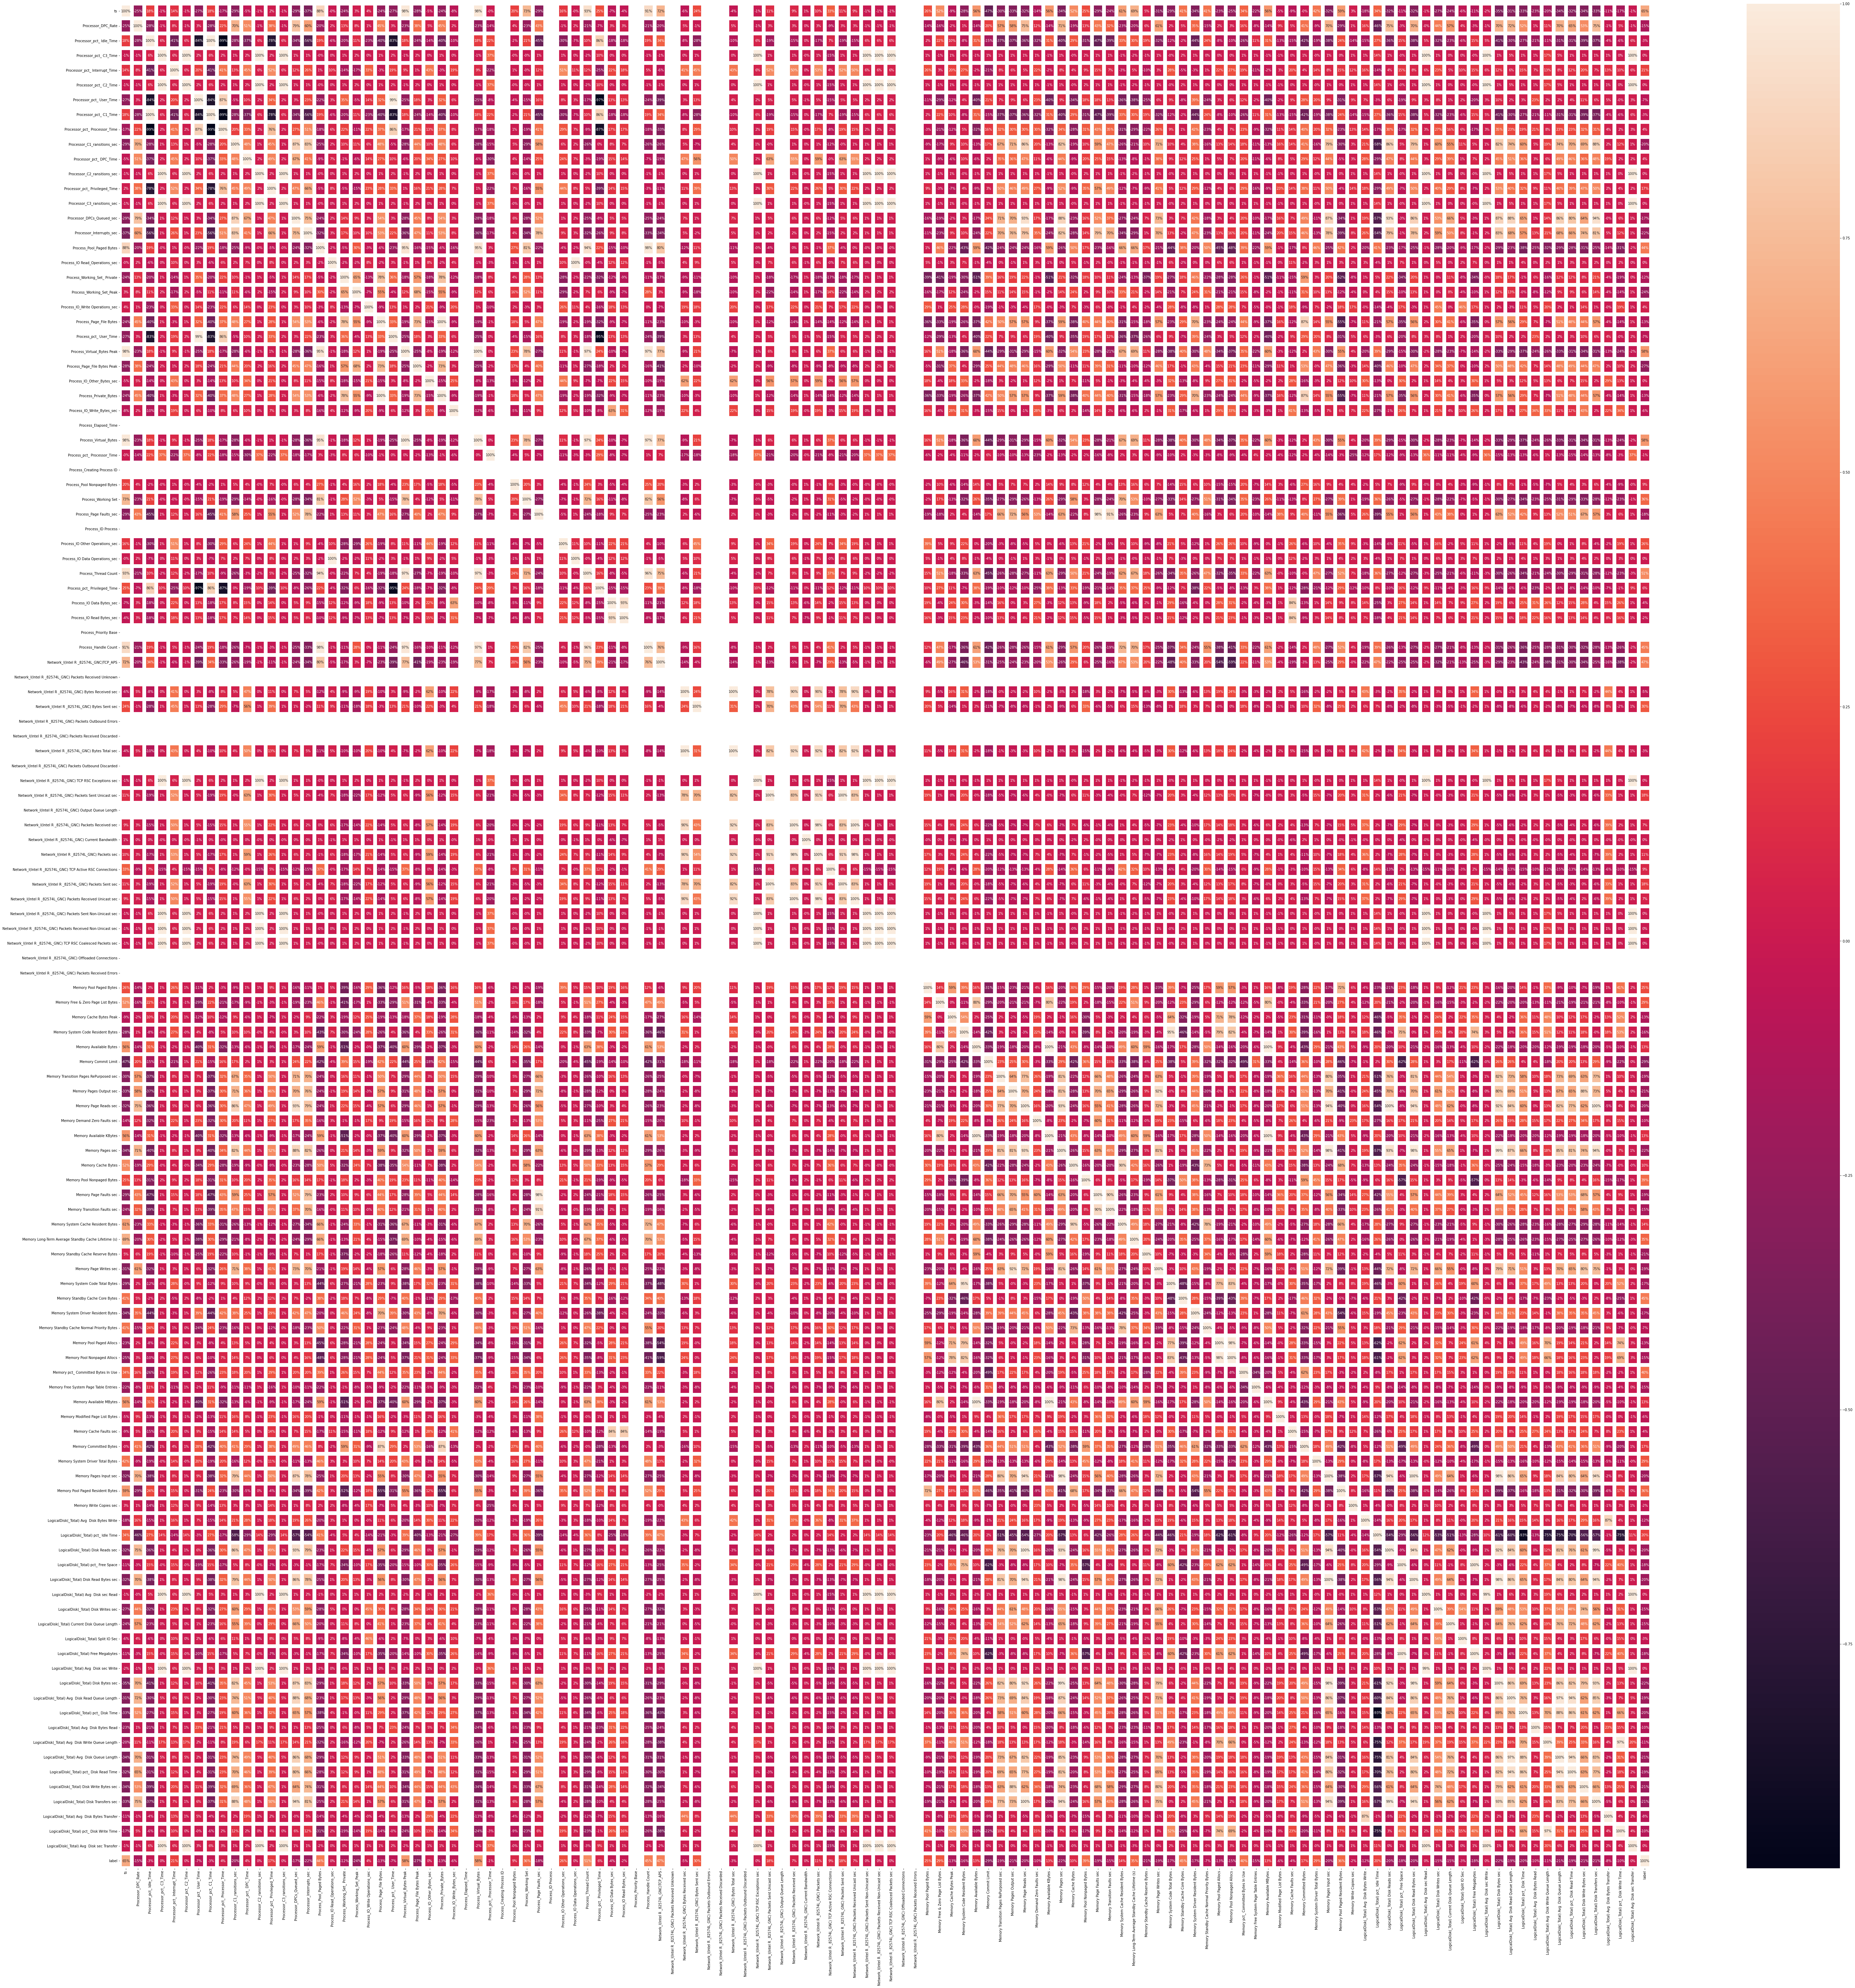

In [ ]:

fig, ax = plt.subplots(figsize=(100,100))
sns.heatmap(df.iloc[:,0:126].corr(),annot=True, linewidth = 10, ax=ax, fmt='.0%')

In [ ]:
#sns.pairplot(df.iloc[:,1:126], hue='label')

In [ ]:
# n_samples = 100
# df_sample = df.sample(n_samples , axis=1)
# sns.pairplot(df_sample, hue = 'label')

In [ ]:
# from scipy.stats import spearmanr


# targetVar = df['label']
# corr_threshold = 0.4

# corr = spearmanr(df)
# corrSeries = pd.Series(corr[0][:,0], index=df.columns) #Series with column names and their correlation coefficients
# corrSeries = corrSeries[(corrSeries.index != targetVar) & (corrSeries > corr_threshold)] #apply the threshold

# vars_to_keep = list(corrSeries.index.values) #list of variables to keep
# vars_to_keep.append(targetVar)  #add the target variable back in
# data2 = df[vars_to_keep]

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# -------------------  Splitting Begins Here ------------------------------------------
# # Splitting the dataset into independent X and dependent Y
x = df.drop(['type','label'],axis=1)
y = df['label']

# #Train and Test Split --- > Train : 80%, Test : 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=22)
print("Training dataset shape : ",x_train.shape)
print("Testing dataset shape : ",x_test.shape)
# x_train.head()

Training dataset shape :  (28780, 125)
Testing dataset shape :  (7195, 125)


In [ ]:
def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

In [ ]:
def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

In [ ]:
# --------------------------Random Forest -----------------------------------
from sklearn.ensemble import RandomForestClassifier
from statistics import mean
rfc = RandomForestClassifier(n_estimators=22)
rfc.fit(x_train, y_train)
accuracy_train_RFC=rfc.score(x_train, y_train)
accuracy_test_RFC=rfc.score(x_test, y_test)
print("Normal Training accuracy is {:.2f}".format(accuracy_train_RFC))
print("Normal Testing accuracy is {:.9f}".format(accuracy_test_RFC))

Normal Training accuracy is 1.00
Normal Testing accuracy is 0.984572620


In [ ]:
RF_accuracy_scores = []
RF_f1_scores = []

for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    RF_accuracy_scores.append(get_accuracy_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))
    RF_f1_scores.append(get_f1_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))

print('K-Fold Accuracy Score: ',mean(RF_accuracy_scores))
print('K-Fold F1 Score:', mean(RF_f1_scores))

K-Fold Accuracy Score:  0.9834606275674491
K-Fold F1 Score: 0.9739329638811991


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0.0: 21763, 1.0: 9716}
After oversampling {0.0: 21763, 1.0: 21763}


In [ ]:
RF_accuracy_scores = []
RF_f1_scores = []

for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

    RF_accuracy_scores.append(get_accuracy_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))
    RF_f1_scores.append(get_f1_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))

print('Accuracy Score after oversampling: ',mean(RF_accuracy_scores))
print('F1 Score after oversampling:', mean(RF_f1_scores))

Accuracy Score after oversampling:  0.9888571892872201
F1 Score after oversampling: 0.9888592778536291
